In [1]:
from datetime import datetime
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch
import matplotlib.pyplot as plt

/opt/conda/envs/logo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#使用するモデルを設定
model_id = "stabilityai/stable-diffusion-2"

#StableDiffusionパイプライン設定
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)

#使用する計算機を設定（GPUがない場合は"cpu"に変更）
pipe = pipe.to("cuda")

/opt/conda/envs/logo/lib/python3.10/site-packages/diffusers/pipelines/pipeline_utils.py:267: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2 via `revision='fp16'`. This behavior is deprecated and will be removed in diffusers v1. One should use `variant='fp16'` instead. However, it appears that stabilityai/stable-diffusion-2 currently does not have the required variant filenames in the 'main' branch. 
 The Diffusers team and community would be very grateful if you could open an issue: https://github.com/huggingface/diffusers/issues/new with the title 'stabilityai/stable-diffusion-2 is missing fp16 files' so that the correct variant file can be added.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found
Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]
pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   1%|         

100%|██████████| 50/50 [00:07<00:00,  6.68it/s]


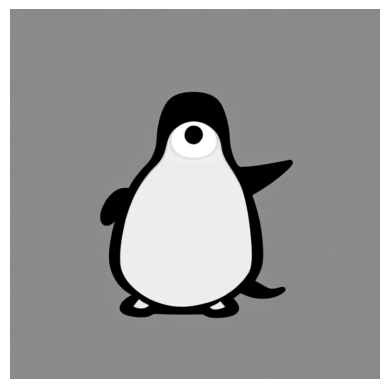

100%|██████████| 50/50 [00:06<00:00,  7.36it/s]


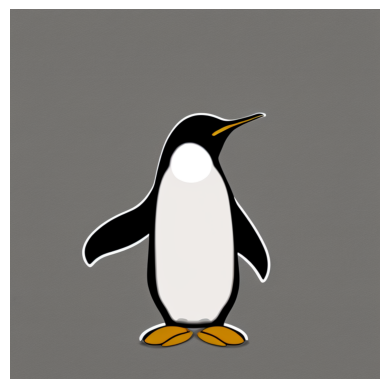

In [3]:
import os
from datetime import datetime
import matplotlib.pyplot as plt

# 画像生成の指示（呪文）
prompt = f"Design a cute logo for a emperor_penguin"

# 描画する回数を設定
num_images = 2

# 現在のディレクトリに 'data/out' ディレクトリを作成（存在しない場合）
output_dir = os.path.join(os.getcwd(), "data", "out")
os.makedirs(output_dir, exist_ok=True)

# イラスト生成
for i in range(num_images):
    # 推論実行 (この部分は具体的な画像生成方法に依存します)
    image = pipe(prompt, height=768, width=768).images[0]

    # 生成日時をファイル名にして保存
    date = datetime.now().strftime("%Y%m%d_%H%M%S")
    path = os.path.join(output_dir, f"{date}_prompt_{prompt}_{i}.jpg")
    image.save(path)

    # 画像を表示
    plt.imshow(image)
    plt.axis('off')  # 軸を非表示にする
    plt.show()
